In [5]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append("..")
import pickle
import yaml
# import dcargs
import pandas as pd
from experiment import ExperimentParameters
import glob
from tqdm import tqdm
from yaml.loader import SafeLoader
import seaborn as sns
import matplotlib as mpl

# Setting default colormap settings
from palettable.scientific.diverging import Berlin_3
from palettable.lightbartlein.diverging import BlueOrange10_2, BlueOrange12_2, BlueOrangeRed_2
from palettable.matplotlib import Viridis_3
CMap = Viridis_3.get_mpl_colormap()

def get_colorMaps(nIds):
    weights = np.arange(0, nIds)

    norm = mpl.colors.Normalize(vmin=0, vmax=nIds)
    cmap = mpl.cm.ScalarMappable(norm=norm, cmap=CMap)

    return cmap


Load Bayes DataFrame

In [7]:
# path = "/home/mohsen/Project/colab/collective-decison-making-with-direl/results/"
path = "../../results/"
sys.path.append(path)

# experiment_name = "2022-12-02-15-52-46_test_grid_search_Bayes"
# experiment_name = "2022-11-25-02-21-50_test_grid_search_Bayes"
# experiment_name = "2022-10-29-15-36-50_test_grid_search_Bayes"
# experiment_name_bayes = "N100_2023-05-02-14-58-42_test_grid_search_Bayes_centralized_random"
experiment_name_bayes = "N100_2023-05-30-13-09-03_test_grid_search_Bayes_centralized_random"

experiment_bayes_folder_path = path + "/" + experiment_name_bayes

dataFrame_bayes_path = path + "/" + experiment_name_bayes + "/results__df_withNet_overTime_updatedEigs.pickle"

with open(dataFrame_bayes_path, "rb") as f:
    df_bayes = pickle.load(f)

Load Bayes CI DataFrame

In [8]:
# experiment_name_bayes_CI = "N100_2023-04-18-11-16-30_test_grid_search_BayesCI_centralized_random"
experiment_name_bayes_CI = "N100_2023-05-30-13-13-24_test_grid_search_BayesCI_centralized_random"

experiment_bayes_CI_folder_path = path + "/" + experiment_name_bayes_CI 

dataFrame_bayes_CI_path = path + "/" + experiment_name_bayes_CI + "/results__df_withNet_overTime_updatedEigs.pickle"

with open(dataFrame_bayes_CI_path, "rb") as f:
    df_bayes_CI = pickle.load(f)

Load Naive dataframe

In [9]:
# experiment_name_naive = "N100_2023-05-16-14-12-06_test_grid_search_Naive_centralized_random"
experiment_name_naive = "N100_2023-05-30-12-37-54_test_grid_search_Naive_centralized_random"

experiment_folder_path_naive = path + "/" + experiment_name_naive 

dataFrame_path_naive = path + "/" + experiment_name_naive + "/results__df_withNet_updatedEigs.pickle"

with open(dataFrame_path_naive, "rb") as f:
    df_naive = pickle.load(f)

Bayes vs Naive: Take a specifc instance of dataframe by defining scalar param 1, std env noise, mean agent noise, num agents

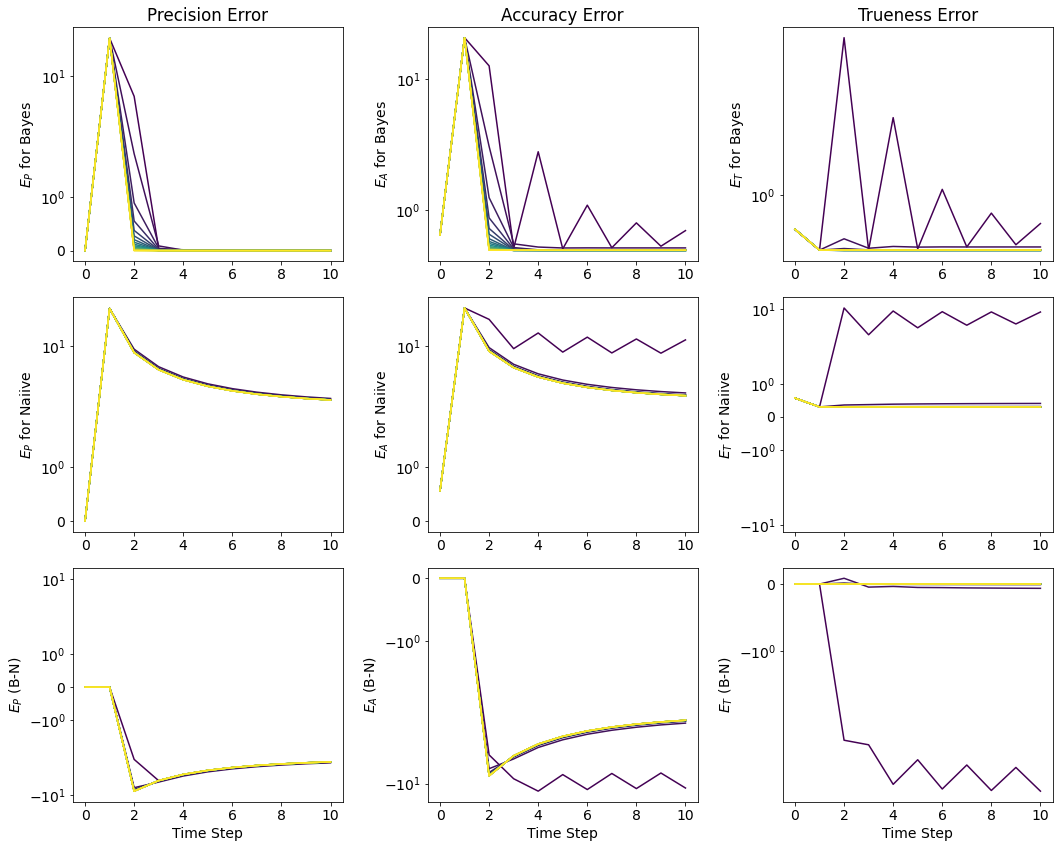

In [14]:
# val_to_plot_bayes = df_bayes['Trueness Error'].mean()
scalar_param_vals = np.unique(df_bayes["scalar_param1"])
weight_own_belief_vals = np.unique(df_naive.weight_own_belief)

plt.rc('font', size=14)

# scalar_param_to_check = scalar_param_vals[19]#1.0


str_to_plot_list = {"Accuracy", "Precision", "Trueness"}
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15,12))

for i_plot, str_to_plot in enumerate(str_to_plot_list):
# for str_to_plot in str_to_plot_list:
    
    for scalar_param_to_check in scalar_param_vals:#[10:11]:
        std_environment_noise_to_check = np.unique(df_bayes["std_environment_noise"])[-1] # 1.0#0.0001
        num_agents_to_check = 100
        df_bayes_filtered = df_bayes
        df_bayes_filtered = df_bayes_filtered[df_bayes_filtered["scalar_param1"]==scalar_param_to_check]
        df_bayes_filtered = df_bayes_filtered[df_bayes_filtered["std_environment_noise"]==std_environment_noise_to_check]# and
        df_bayes_filtered = df_bayes_filtered[df_bayes_filtered["mean_agent_measurement_noise"]==std_environment_noise_to_check]
        df_bayes_filtered = df_bayes_filtered[df_bayes_filtered["Number_of_Agents"]==num_agents_to_check]

        df_naive_filtered = df_naive
        df_naive_filtered = df_naive_filtered[df_naive_filtered["scalar_param1"]==scalar_param_to_check]
        df_naive_filtered = df_naive_filtered[df_naive_filtered["std_environment_noise"]==std_environment_noise_to_check]# and
        df_naive_filtered = df_naive_filtered[df_naive_filtered["mean_agent_measurement_noise"]==std_environment_noise_to_check]
        df_naive_filtered = df_naive_filtered[df_naive_filtered["Number_of_Agents"]==num_agents_to_check]
        # df_naive_filtered = df_naive_filtered[df_naive_filtered["weight_own_belief"]==weight_own_belief_vals[-1]]
        
        if(str_to_plot=="Trueness"):
            axs[0,i_plot].plot(df_bayes_filtered.groupby("Timestep")["Trueness_Error"].mean(),color=CMap(scalar_param_to_check),label="E_T (B)")
            axs[1,i_plot].plot(df_naive_filtered.groupby("Timestep")["Trueness_Error"].mean(),color=CMap(scalar_param_to_check),label="E_T (N)")
            difference = df_bayes_filtered.groupby("Timestep")["Trueness_Error"].mean()-df_naive_filtered.groupby("Timestep")["Trueness_Error"].mean()
            axs[2,i_plot].plot(difference.to_numpy(),color=CMap(scalar_param_to_check),label="E_T (B-N)")

        elif(str_to_plot=="Precision"):
            axs[0,i_plot].plot(df_bayes_filtered.groupby("Timestep")["Precision_Error"].mean(),color=CMap(scalar_param_to_check),label="E_P (B)")
            axs[1,i_plot].plot(df_naive_filtered.groupby("Timestep")["Precision_Error"].mean(),color=CMap(scalar_param_to_check),label="E_P (N)") #,color="b"
            difference = df_bayes_filtered.groupby("Timestep")["Precision_Error"].mean()-df_naive_filtered.groupby("Timestep")["Precision_Error"].mean()
            axs[2,i_plot].plot(difference.to_numpy(),color=CMap(scalar_param_to_check),label="E_P (B-N)")

        elif(str_to_plot=="Accuracy"):
            axs[0,i_plot].plot(df_bayes_filtered.groupby("Timestep")["Accuracy_Error"].mean(),color=CMap(scalar_param_to_check),label="E_A (B)")
            axs[1,i_plot].plot(df_naive_filtered.groupby("Timestep")["Accuracy_Error"].mean(),color=CMap(scalar_param_to_check),label="E_A (N)") #,color="b"
            difference = df_bayes_filtered.groupby("Timestep")["Accuracy_Error"].mean()-df_naive_filtered.groupby("Timestep")["Accuracy_Error"].mean()
            axs[2,i_plot].plot(difference.to_numpy(),color=CMap(scalar_param_to_check),label="E_A (B-N)")

    if(str_to_plot=="Trueness"):
        axs[0, i_plot].set_ylabel("$E_T$ for Bayes")
        axs[1, i_plot].set_ylabel("$E_T$ for Naiive")
        axs[2, i_plot].set_ylabel("$E_T$ (B-N)")

    elif(str_to_plot=="Precision"):
        axs[0, i_plot].set_ylabel("$E_P$ for Bayes")
        axs[1, i_plot].set_ylabel("$E_P$ for Naiive")
        axs[2, i_plot].set_ylabel("$E_P$ (B-N)")

    elif(str_to_plot=="Accuracy"):
        axs[0, i_plot].set_ylabel("$E_A$ for Bayes")
        axs[1, i_plot].set_ylabel("$E_A$ for Naiive")
        axs[2, i_plot].set_ylabel("$E_A$ (B-N)")
    
    axs[1, i_plot].sharey(axs[i_plot,0])
    axs[2, i_plot].set_xlabel("Time Step")

    axs[0, i_plot].set_title(str_to_plot + " Error")

    axs[0, i_plot].set_yscale('symlog') 
    axs[1, i_plot].set_yscale('symlog') 
    axs[2, i_plot].set_yscale('symlog') 


plt.tight_layout()



fig.set_facecolor("w")
# fig.savefig(path + str_to_plot+"_logy.png")


Bayes CI vs. Naive

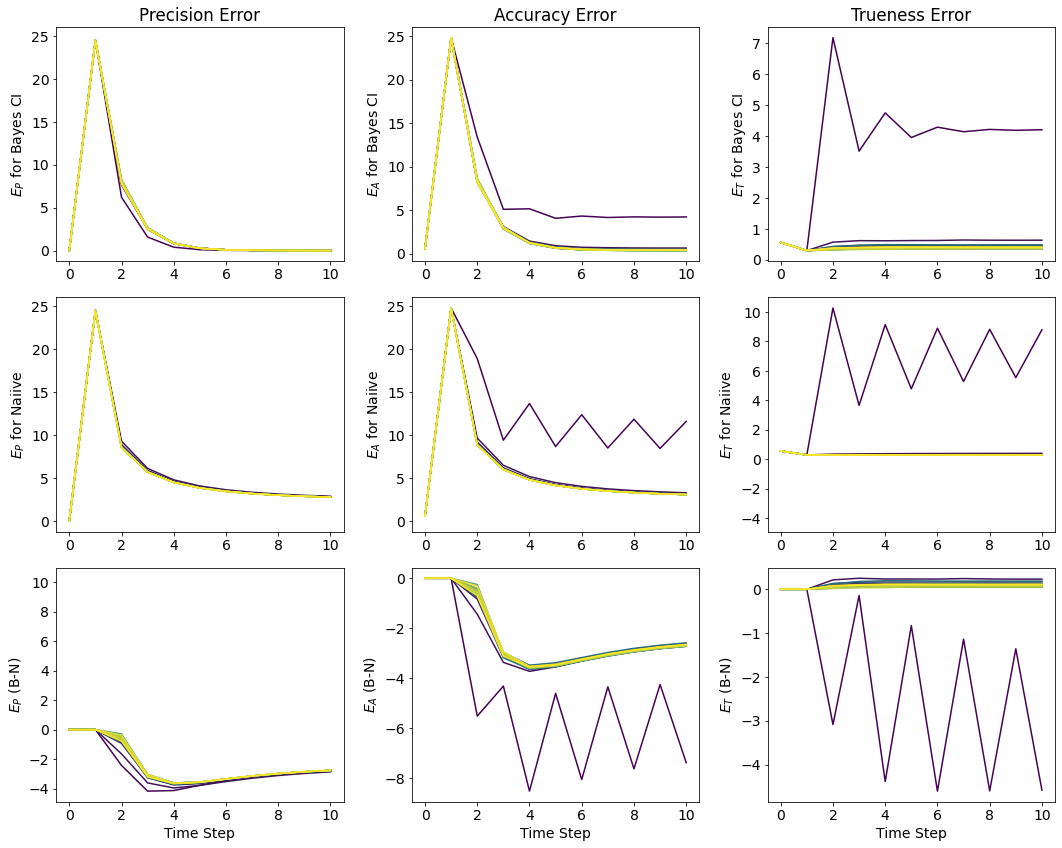

In [15]:
# val_to_plot_bayes = df_bayes['Trueness Error'].mean()
scalar_param_vals = np.unique(df_bayes["scalar_param1"])
weight_own_belief_vals = np.unique(df_naive.weight_own_belief)

plt.rc('font', size=14)

# scalar_param_to_check = scalar_param_vals[19]#1.0

str_to_plot_list = {"Accuracy", "Precision", "Trueness"}
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15,12))

for i_plot, str_to_plot in enumerate(str_to_plot_list):
        
    for scalar_param_to_check in scalar_param_vals:#[10:11]:
        std_environment_noise_to_check = np.unique(df_bayes["std_environment_noise"])[-1] # 1.0#0.0001
        num_agents_to_check = 100
        df_bayes_CI_filtered = df_bayes_CI
        df_bayes_CI_filtered = df_bayes_CI_filtered[df_bayes_CI_filtered["scalar_param1"]==scalar_param_to_check]
        df_bayes_CI_filtered = df_bayes_CI_filtered[df_bayes_CI_filtered["std_environment_noise"]==std_environment_noise_to_check]# and
        df_bayes_CI_filtered = df_bayes_CI_filtered[df_bayes_CI_filtered["mean_agent_measurement_noise"]==std_environment_noise_to_check]
        df_bayes_CI_filtered = df_bayes_CI_filtered[df_bayes_CI_filtered["Number_of_Agents"]==num_agents_to_check]

        df_naive_filtered = df_naive
        df_naive_filtered = df_naive_filtered[df_naive_filtered["scalar_param1"]==scalar_param_to_check]
        df_naive_filtered = df_naive_filtered[df_naive_filtered["std_environment_noise"]==std_environment_noise_to_check]# and
        df_naive_filtered = df_naive_filtered[df_naive_filtered["mean_agent_measurement_noise"]==std_environment_noise_to_check]
        df_naive_filtered = df_naive_filtered[df_naive_filtered["Number_of_Agents"]==num_agents_to_check]
        # df_naive_filtered = df_naive_filtered[df_naive_filtered["weight_own_belief"]==weight_own_belief_vals[0]]
        
        if(str_to_plot=="Trueness"):
            axs[0,i_plot].plot(df_bayes_CI_filtered.groupby("Timestep")["Trueness_Error"].mean(),color=CMap(scalar_param_to_check),label="E_T (B)")
            axs[1,i_plot].plot(df_naive_filtered.groupby("Timestep")["Trueness_Error"].mean(),color=CMap(scalar_param_to_check),label="E_T (N)")
            difference = df_bayes_CI_filtered.groupby("Timestep")["Trueness_Error"].mean()-df_naive_filtered.groupby("Timestep")["Trueness_Error"].mean()
            axs[2,i_plot].plot(difference.to_numpy(),color=CMap(scalar_param_to_check),label="E_T (B-N)")

        elif(str_to_plot=="Precision"):
            axs[0,i_plot].plot(df_bayes_CI_filtered.groupby("Timestep")["Precision_Error"].mean(),color=CMap(scalar_param_to_check),label="E_P (B)")
            axs[1,i_plot].plot(df_naive_filtered.groupby("Timestep")["Precision_Error"].mean(),color=CMap(scalar_param_to_check),label="E_P (N)") #,color="b"
            difference = df_bayes_CI_filtered.groupby("Timestep")["Precision_Error"].mean()-df_naive_filtered.groupby("Timestep")["Precision_Error"].mean()
            axs[2,i_plot].plot(difference.to_numpy(),color=CMap(scalar_param_to_check),label="E_P (B-N)")

        elif(str_to_plot=="Accuracy"):
            axs[0,i_plot].plot(df_bayes_CI_filtered.groupby("Timestep")["Accuracy_Error"].mean(),color=CMap(scalar_param_to_check),label="E_A (B)")
            axs[1,i_plot].plot(df_naive_filtered.groupby("Timestep")["Accuracy_Error"].mean(),color=CMap(scalar_param_to_check),label="E_A (N)") #,color="b"
            difference = df_bayes_CI_filtered.groupby("Timestep")["Accuracy_Error"].mean()-df_naive_filtered.groupby("Timestep")["Accuracy_Error"].mean()
            axs[2,i_plot].plot(difference.to_numpy(),color=CMap(scalar_param_to_check),label="E_A (B-N)")

    if(str_to_plot=="Trueness"):
        axs[0, i_plot].set_ylabel("$E_T$ for Bayes CI")
        axs[1, i_plot].set_ylabel("$E_T$ for Naiive")
        axs[2, i_plot].set_ylabel("$E_T$ (B-N)")

    elif(str_to_plot=="Precision"):
        axs[0, i_plot].set_ylabel("$E_P$ for Bayes CI")
        axs[1, i_plot].set_ylabel("$E_P$ for Naiive")
        axs[2, i_plot].set_ylabel("$E_P$ (B-N)")

    elif(str_to_plot=="Accuracy"):
        axs[0, i_plot].set_ylabel("$E_A$ for Bayes CI")
        axs[1, i_plot].set_ylabel("$E_A$ for Naiive")
        axs[2, i_plot].set_ylabel("$E_A$ (B-N)")
    
    axs[1, i_plot].sharey(axs[i_plot,0])
    axs[2, i_plot].set_xlabel("Time Step")

    axs[0, i_plot].set_title(str_to_plot + " Error")

    # axs[0, i_plot].set_yscale('symlog') 
    # axs[1, i_plot].set_yscale('symlog') 
    # axs[2, i_plot].set_yscale('symlog') 


plt.tight_layout()

# axs[0].set_yscale('log') 
# axs[1].set_yscale('log') 

fig.set_facecolor("w")
# fig.savefig(path + str_to_plot+"_logy.png")


Bayes vs. Bayes CI

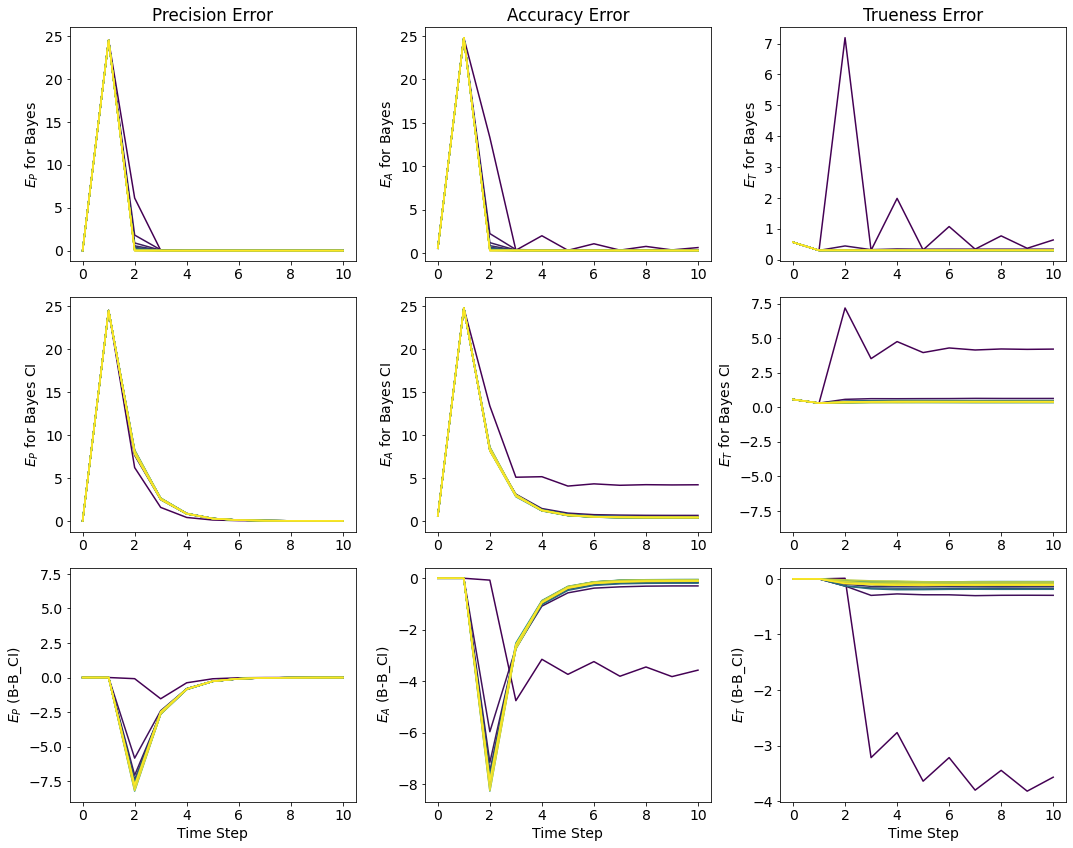

In [12]:
# val_to_plot_bayes = df_bayes['Trueness Error'].mean()
scalar_param_vals = np.unique(df_bayes["scalar_param1"])
weight_own_belief_vals = np.unique(df_naive.weight_own_belief)

plt.rc('font', size=14)

# scalar_param_to_check = scalar_param_vals[19]#1.0

str_to_plot_list = {"Accuracy", "Precision", "Trueness"}
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15,12))

for i_plot, str_to_plot in enumerate(str_to_plot_list):
    
    for scalar_param_to_check in scalar_param_vals:#[10:11]:
        std_environment_noise_to_check = np.unique(df_bayes["std_environment_noise"])[-1] # 1.0#0.0001
        num_agents_to_check = 100
        
        df_bayes_filtered = df_bayes
        df_bayes_filtered = df_bayes_filtered[df_bayes_filtered["scalar_param1"]==scalar_param_to_check]
        df_bayes_filtered = df_bayes_filtered[df_bayes_filtered["std_environment_noise"]==std_environment_noise_to_check]# and
        df_bayes_filtered = df_bayes_filtered[df_bayes_filtered["mean_agent_measurement_noise"]==std_environment_noise_to_check]
        df_bayes_filtered = df_bayes_filtered[df_bayes_filtered["Number_of_Agents"]==num_agents_to_check]

        df_bayes_CI_filtered = df_bayes_CI
        df_bayes_CI_filtered = df_bayes_CI_filtered[df_bayes_CI_filtered["scalar_param1"]==scalar_param_to_check]
        df_bayes_CI_filtered = df_bayes_CI_filtered[df_bayes_CI_filtered["std_environment_noise"]==std_environment_noise_to_check]# and
        df_bayes_CI_filtered = df_bayes_CI_filtered[df_bayes_CI_filtered["mean_agent_measurement_noise"]==std_environment_noise_to_check]
        df_bayes_CI_filtered = df_bayes_CI_filtered[df_bayes_CI_filtered["Number_of_Agents"]==num_agents_to_check]


        if(str_to_plot=="Trueness"):
            axs[0,i_plot].plot(df_bayes_filtered.groupby("Timestep")["Trueness_Error"].mean(),color=CMap(scalar_param_to_check),label="E_T (B)")
            axs[1,i_plot].plot(df_bayes_CI_filtered.groupby("Timestep")["Trueness_Error"].mean(),color=CMap(scalar_param_to_check),label="E_T (B_CI)")
            difference = df_bayes_filtered.groupby("Timestep")["Trueness_Error"].mean()-df_bayes_CI_filtered.groupby("Timestep")["Trueness_Error"].mean()
            axs[2,i_plot].plot(difference.to_numpy(),color=CMap(scalar_param_to_check),label="E_T (B-B_CI)")

        elif(str_to_plot=="Precision"):
            axs[0,i_plot].plot(df_bayes_filtered.groupby("Timestep")["Precision_Error"].mean(),color=CMap(scalar_param_to_check),label="E_P (B)")
            axs[1,i_plot].plot(df_bayes_CI_filtered.groupby("Timestep")["Precision_Error"].mean(),color=CMap(scalar_param_to_check),label="E_P (B_CI)") #,color="b"
            difference = df_bayes_filtered.groupby("Timestep")["Precision_Error"].mean()-df_bayes_CI_filtered.groupby("Timestep")["Precision_Error"].mean()
            axs[2,i_plot].plot(difference.to_numpy(),color=CMap(scalar_param_to_check),label="E_P (B-B_CI)")

        elif(str_to_plot=="Accuracy"):
            axs[0,i_plot].plot(df_bayes_filtered.groupby("Timestep")["Accuracy_Error"].mean(),color=CMap(scalar_param_to_check),label="E_A (B)")
            axs[1,i_plot].plot(df_bayes_CI_filtered.groupby("Timestep")["Accuracy_Error"].mean(),color=CMap(scalar_param_to_check),label="E_A (B_CI)") #,color="b"
            difference = df_bayes_filtered.groupby("Timestep")["Accuracy_Error"].mean()-df_bayes_CI_filtered.groupby("Timestep")["Accuracy_Error"].mean()
            axs[2,i_plot].plot(difference.to_numpy(),color=CMap(scalar_param_to_check),label="E_A (B-B_CI)")


    if(str_to_plot=="Trueness"):
        axs[0, i_plot].set_ylabel("$E_T$ for Bayes")
        axs[1, i_plot].set_ylabel("$E_T$ for Bayes CI")
        axs[2, i_plot].set_ylabel("$E_T$ (B-B_CI)")

    elif(str_to_plot=="Precision"):
        axs[0, i_plot].set_ylabel("$E_P$ for Bayes")
        axs[1, i_plot].set_ylabel("$E_P$ for Bayes CI")
        axs[2, i_plot].set_ylabel("$E_P$ (B-B_CI)")

    elif(str_to_plot=="Accuracy"):
        axs[0, i_plot].set_ylabel("$E_A$ for Bayes")
        axs[1, i_plot].set_ylabel("$E_A$ for Bayes CI")
        axs[2, i_plot].set_ylabel("$E_A$ (B-B_CI)")
    
    axs[1, i_plot].sharey(axs[i_plot,0])
    axs[2, i_plot].set_xlabel("Time Step")

    axs[0, i_plot].set_title(str_to_plot + " Error")


plt.tight_layout()

# axs[0].set_yscale('log') 
# axs[1].set_yscale('log') 

fig.set_facecolor("w")
# fig.savefig(path + str_to_plot+"_logy.png")


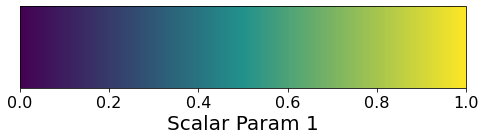

In [51]:
cmap = CMap

fig, ax = plt.subplots(figsize=(8,1.5))
col_map = plt.get_cmap(cmap)
mpl.colorbar.ColorbarBase(ax, cmap=col_map, orientation = 'horizontal')
ax.set_xlabel("Scalar Param 1",fontdict={'size':20})

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)

fig.set_facecolor("w")
# fig.savefig(path+"ColorMap.png",dpi=300, bbox_inches = "tight")
plt.show()


The Manual version of visualization

In [ ]:
fig = plt.figure(1,figsize=(14,10))
fig.set_facecolor('w')

# ax1 = plt.subplot(2,3,1); ax1.set_title("Trueness Error")
df_bayes_filtered.plot.hexbin(x="std environment noise", y="scalar param1",C="Trueness Error", reduce_C_function=np.mean, gridsize=15);#, ax=ax1);

# ax5 = plt.subplot(2,3,2); ax5.set_title("Precision Error")
# df_bayes_filtered.plot.hexbin(x="std environment noise",    y="scalar param1",C="Precision Error", reduce_C_function=np.mean, gridsize=15, ax=ax5);

# ax8 = plt.subplot(2,3,3); ax8.set_title("Accuracy Error")
# df_bayes_filtered.plot.hexbin(x="std environment noise",    y="scalar param1",C="Accuracy Error", reduce_C_function=np.mean, gridsize=15, ax=ax8);


# ax1 = plt.subplot(2,3,4); ax1.set_title("Trueness Error")
# df_naive_filtered.plot.hexbin(x="std environment noise", y="scalar param1",C="Trueness Error", reduce_C_function=np.mean, gridsize=15, ax=ax1);

# ax5 = plt.subplot(2,3,5); ax5.set_title("Precision Error")
# df_naive_filtered.plot.hexbin(x="std environment noise",    y="scalar param1",C="Precision Error", reduce_C_function=np.mean, gridsize=15, ax=ax5);

# ax8 = plt.subplot(2,3,6); ax8.set_title("Accuracy Error")
# df_naive_filtered.plot.hexbin(x="std environment noise",    y="scalar param1",C="Accuracy Error", reduce_C_function=np.mean, gridsize=15, ax=ax8);

In [ ]:
fig = plt.figure(1,figsize=(15,14))
fig.set_facecolor('w')
# plt.rcParams['figure.figsize'] = [10, 5]
ax1 = plt.subplot(3,3,1); ax1.set_title("Trueness Error")
df_filtered.plot.hexbin(x="mean agent measurement noise",   y="scalar param1",C="Trueness Error", reduce_C_function=np.mean, gridsize=15, ax=ax1);
ax2 = plt.subplot(3,3,2); ax2.set_title("Trueness Error")
df_filtered.plot.hexbin(x="std environment noise",    y="scalar param1",C="Trueness Error", reduce_C_function=np.mean, gridsize=15, ax=ax2);
ax3 = plt.subplot(3,3,3); ax3.set_title("Trueness Error")
df_filtered.plot.hexbin(x="mean agent measurement noise",   y="std environment noise", C="Trueness Error", reduce_C_function=np.mean, gridsize=15, ax=ax3);
# df_filtered.plot.hexbin(x="scalar param1",                  y="scalar param1",C="Trueness Error",  gridsize=15, ax=ax3);

ax4 = plt.subplot(3,3,4); ax4.set_title("Precision Error")
df_filtered.plot.hexbin(x="mean agent measurement noise",   y="scalar param1",C="Precision Error", reduce_C_function=np.mean, gridsize=15, ax=ax4);
ax5 = plt.subplot(3,3,5); ax5.set_title("Precision Error")
df_filtered.plot.hexbin(x="std environment noise",    y="scalar param1",C="Precision Error", reduce_C_function=np.mean, gridsize=15, ax=ax5);
ax6 = plt.subplot(3,3,6); ax6.set_title("Precision Error")
df_filtered.plot.hexbin(x="mean agent measurement noise",   y="std environment noise", C="Precision Error", reduce_C_function=np.mean, gridsize=15, ax=ax6);
# df_filtered.plot.hexbin(x="scalar param1",                  y="scalar param1",C="Precision Error", reduce_C_function=np.max, gridsize=15, ax=ax6);

ax7 = plt.subplot(3,3,7); ax7.set_title("Accuracy Error")
df_filtered.plot.hexbin(x="mean agent measurement noise",   y="scalar param1",C="Accuracy Error", reduce_C_function=np.mean, gridsize=15, ax=ax7);
ax8 = plt.subplot(3,3,8); ax8.set_title("Accuracy Error")
df_filtered.plot.hexbin(x="std environment noise",    y="scalar param1",C="Accuracy Error", reduce_C_function=np.mean, gridsize=15, ax=ax8);
ax9 = plt.subplot(3,3,9); ax8.set_title("Accuracy Error")
df_filtered.plot.hexbin(x="mean agent measurement noise",   y="std environment noise", C="Accuracy Error", reduce_C_function=np.mean, gridsize=15, ax=ax9);
# df_filtered.plot.hexbin(x="scalar param1",                  y="scalar param1",C="Accuracy Error", reduce_C_function=np.max, gridsize=15, ax=ax9);

# df_filtered.plot.hexbin(x="std environment noise", y="scalar param1", C="Precision Error", reduce_C_function=np.max, gridsize=15, ax=ax3);

In [ ]:

fig = plt.figure(1,figsize=(15,12))
# plt.rcParams['figure.figsize'] = [10, 5]
ax1 = plt.subplot(3,3,1)
df_filtered.plot.scatter(x="mean agent measurement noise",   y="scalar param1",c="Trueness Error",ax=ax1);
ax2 = plt.subplot(3,3,2)
df_filtered.plot.scatter(x="std environment noise",    y="scalar param1",c="Trueness Error",  ax=ax2);
ax3 = plt.subplot(3,3,3)
df_filtered.plot.scatter(x="mean agent measurement noise",   y="std environment noise", c="Trueness Error",   ax=ax3);
# df_filtered.plot.hexbin(x="scalar param1",                  y="scalar param1",C="Trueness Error",  ax=ax3);

ax4 = plt.subplot(3,3,4)
df_filtered.plot.scatter(x="mean agent measurement noise",   y="scalar param1",c="Precision Error",  ax=ax4);
ax5 = plt.subplot(3,3,5)
df_filtered.plot.scatter(x="std environment noise",    y="scalar param1",c="Precision Error",  ax=ax5);
ax6 = plt.subplot(3,3,6)
df_filtered.plot.scatter(x="mean agent measurement noise",   y="std environment noise", c="Precision Error",  ax=ax6);
# df_filtered.plot.hexbin(x="scalar param1",                  y="scalar param1",C="Precision Error",  ax=ax6);

ax7 = plt.subplot(3,3,7)
df_filtered.plot.scatter(x="mean agent measurement noise",   y="scalar param1",c="Accuracy Error",  ax=ax7);
ax8 = plt.subplot(3,3,8)
df_filtered.plot.scatter(x="std environment noise",    y="scalar param1",c="Accuracy Error",  ax=ax8);
ax9 = plt.subplot(3,3,9)
df_filtered.plot.scatter(x="mean agent measurement noise",   y="std environment noise", c="Accuracy Error",  ax=ax9);
# df_filtered.plot.hexbin(x="scalar param1",                  y="scalar param1",C="Accuracy Error",  ax=ax9);
